In [373]:
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [374]:
import csv

In [375]:
import pandas as pd
data=pd.read_csv(r"C:\Users\Bhuvan\OneDrive\Desktop\New folder (6)\perceptron.csv")

In [376]:
shuffled_data = data.sample(frac=1, random_state=123)

In [377]:
shuffled_data

,0.77,-1.14,0
8,-1.26,-2.90,0
69,0.51,2.44,1
50,0.73,2.97,1
28,-2.59,-2.21,0
62,1.56,3.85,1
...,...,...,...
57,2.95,1.84,1
83,3.19,2.32,1
17,0.02,-0.02,0
92,0.90,2.05,1


In [378]:
train_data = shuffled_data.iloc[:70]
test_data = shuffled_data.iloc[70:]

In [379]:
train_data


,0.77,-1.14,0
8,-1.26,-2.90,0
69,0.51,2.44,1
50,0.73,2.97,1
28,-2.59,-2.21,0
62,1.56,3.85,1
...,...,...,...
58,2.61,2.92,1
70,2.17,2.64,1
64,1.23,2.54,1
3,-1.84,-1.13,0


In [380]:
test_data

,0.77,-1.14,0
34,-0.68,-1.52,0
27,-1.61,-1.28,0
52,1.59,1.25,1
7,0.39,-1.99,0
48,-1.52,-1.14,0
61,1.31,1.85,1
97,2.77,2.82,1
98,4.16,3.34,1
39,-3.33,-0.44,0
2,-0.37,-1.91,0


In [381]:
X_train = train_data.iloc[:, :2]
X_test = test_data.iloc[:, :2]
y_train = train_data.iloc[:, 2]
y_test = test_data.iloc[:, 2]

In [382]:
X_train
#y_train


,0.77,-1.14
8,-1.26,-2.90
69,0.51,2.44
50,0.73,2.97
28,-2.59,-2.21
62,1.56,3.85
...,...,...
58,2.61,2.92
70,2.17,2.64
64,1.23,2.54
3,-1.84,-1.13


In [383]:
mu, sigma = X_train.mean(), X_train.std()
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

In [384]:
#mu
sigma


0.77     2.262066
-1.14    2.378071
dtype: float64

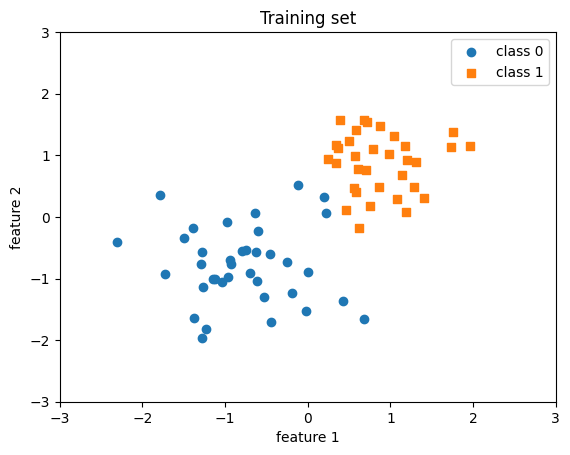

In [385]:
plt.scatter(X_train[y_train == 0].iloc[:, 0], X_train[y_train == 0].iloc[:, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train == 1].iloc[:, 0], X_train[y_train == 1].iloc[:, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

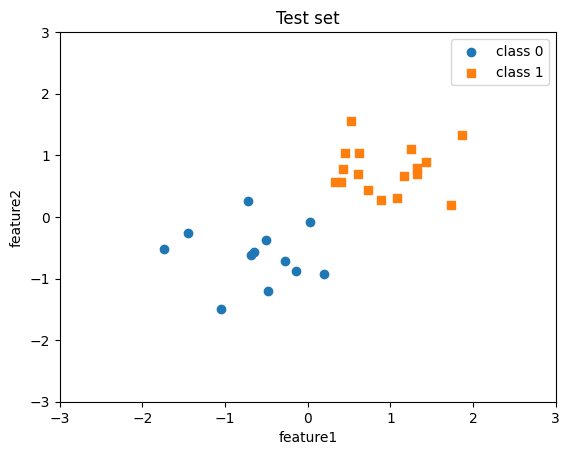

In [386]:
plt.scatter(X_test[y_test==0].iloc[:,0],X_test[y_test==0].iloc[:,1],label='class 0', marker='o')
plt.scatter(X_test[y_test==1].iloc[:,0],X_test[y_test==1].iloc[:,1],label='class 1', marker='s')
plt.title("Test set")
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend()
plt.show()


In [387]:
class perceptron():
    def __init__(self, input_features):
        self.input_features = input_features
        self.weights=torch.zeros(input_features,1,dtype=torch.float32)
        self.bias=torch.zeros(1,dtype=torch.float32)
        self.ones=torch.ones(1)
        self.zeros=torch.zeros(1)
    def forward(self,x):
        linear = torch.mm(x, self.weights) + self.bias
        predictions=torch.where(linear>0,self.ones,self.zeros)
        return predictions
    def backward(self,x,y):
        predictions=self.forward(x)
        error=y-predictions
        return error
    def train(self,x,y,epochs,input_features):
        for e in range(epochs):
            for i in range(y.shape[0]):

                errors = self.backward(x[i].reshape(1, self.input_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.input_features, 1)
                self.bias += errors
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        print(predictions)
        print(y)
        accuracy = torch.sum(predictions == y).float() / len(y)
        return accuracy






In [388]:
ppn = perceptron(input_features=2)

X_train_array = X_train.values.astype(np.float32)
y_train_array = y_train.values.astype(np.float32)

X_train_tensor = torch.tensor(X_train_array)
y_train_tensor = torch.tensor(y_train_array)

In [389]:

ppn.train(X_train_tensor, y_train_tensor, epochs=1,input_features=2)

In [390]:

X_test_array = X_test.values.astype(np.float32)
y_test_array = y_test.values.astype(np.float32)

X_test_tensor = torch.tensor(X_train_array)
y_test_tensor = torch.tensor(y_train_array)

In [391]:
ppn.bias
ppn.weights

tensor([[1.6924],
        [1.1753]])

In [392]:
test_acc = ppn.evaluate(X_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (test_acc*100))

tensor([0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
        1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
        1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.])
tensor([0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
        1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
        1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.])
Test set accuracy: 97.14%


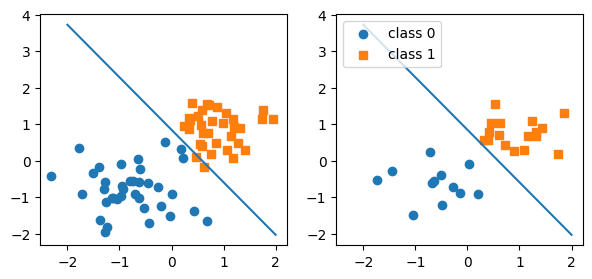

In [393]:
w, b = ppn.weights.detach().numpy(), ppn.bias.item()

x0_min = -2
x1_min = ( (-(w[0] * x0_min) - b) / w[1] )

x0_max = 2
x1_max = ( (-(w[0] * x0_max) - b) / w[1] )

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].plot([x0_min, x0_max], [x1_min, x1_max])

# Assuming X_train and X_test are NumPy arrays
ax[0].scatter(X_train[y_train == 0].iloc[:, 0], X_train[y_train == 0].iloc[:, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train == 1].iloc[:, 0], X_train[y_train == 1].iloc[:, 1], label='class 1', marker='s')
ax[1].scatter(X_test[y_test == 0].iloc[:, 0], X_test[y_test == 0].iloc[:, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test == 1].iloc[:, 0], X_test[y_test == 1].iloc[:, 1], label='class 1', marker='s')


ax[1].legend(loc='upper left')
plt.show()
